# Projet en Big Data - DAILLY Thomas

Pour ce projet, nous allons nous intéresser à la base de données `horodateurs` qui représente l'ensemble des transactions sur les horodateurs dans la ville de Paris sur l'année 2014.
Commençons tout d'abord par importer la librairie `pymongo` et créons une connexion entre `python` et _MongoDB_ en utilisant la fonction `MongoClient()` (on importe également la librairie `pprint` qui nous permettra d'améliorer l'affichage de nos résultats ainsi que la librairie `pandas` pour passer nos résultats sous le format _dataframe_) :

In [2]:
import pandas
import pprint
import pymongo

connexion = pymongo.MongoClient("mongodb://193.51.82.104:2343/")

Par l'intermédiaire de l'objet `connexion`, on récupère la base `horodateurs` que nous allons pouvoir ranger dans l'objet `horo` afin de le manipuler par la suite.

In [3]:
horo = connexion.horodateurs
horo.list_collection_names()

['transactions_small', 'myresults', 'transactions', 'mobiliers']

Il s'agit donc d'une base de données comportant quatre collection de données. Pour ce projet, nous nous focaliserons surtout sur les deux collections principales de cette base de données : la collection `transactions` qui contient l'ensemble des paiements et la collection `mobiliers` listant tous les horodateurs de la ville de Paris.
Dans un premier temps, nous pouvons calculer le nombre de transactions par arrondissement.

In [4]:
res = horo.transactions_small.aggregate([
{ "$lookup": {
        "from": "mobiliers",
        "localField": "horodateur",
        "foreignField": "fields.numhoro",
        "as": "mobilier"
    }},
    { "$limit": 5}
])
liste = list(res)
pprint.pprint(liste)

[{'_id': ObjectId('56eaaa009fae0d71f756f620'),
  'date horodateur': datetime.datetime(2014, 7, 16, 12, 51, 9),
  'durée payée (h)': 1.0,
  'début stationnement': datetime.datetime(2014, 7, 16, 12, 51, 9),
  'fin stationnement': datetime.datetime(2014, 7, 16, 13, 51, 9),
  'horodateur': 36590413,
  'mobilier': [{'_id': ObjectId('56eaa4552d7eb34e4432f0b2'),
                'datasetid': 'horodateurs-mobiliers',
                'fields': {'adresse': '53 AVENUE DE FLANDRE',
                           'alim': 'PILE',
                           'arrondt': 19,
                           'geo_point_2d': [48.88731299986811,
                                            2.372200999965684],
                           'geo_shape': {'coordinates': [2.372200999965684,
                                                         48.88731299986811],
                                         'type': 'Point'},
                           'modele': 'SMB2',
                           'numhoro': 36590413,
         

In [5]:
pprint.pprint(horo.mobiliers.find_one())

{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
 'datasetid': 'horodateurs-mobiliers',
 'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
            'alim': 'SOLAIRE',
            'arrondt': 8,
            'geo_point_2d': [48.877489999731374, 2.311394999713242],
            'geo_shape': {'coordinates': [2.311394999713242,
                                          48.877489999731374],
                          'type': 'Point'},
            'modele': 'SAB3',
            'numhoro': 57080603,
            'objectid': 4383,
            'regime': 'MIX',
            'tarif': '4,00 E MIX 2U',
            'tarifhor': 4.0,
            'zoneres': '8J'},
 'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
              'type': 'Point'},
 'record_timestamp': '2015-12-02T17:49:46+00:00',
 'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'}


In [24]:
horo.transactions_small.update({}, { "$rename": { "montant carte": "montant"}}, False, True)
res = horo.mobiliers.aggregate([
{ "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    {"$unwind": "$transaction"},
    { "$limit": 5},
    {"$project" : {"transac" : "$transaction.montant carte"}}
])
liste = list(res)
pprint.pprint(liste)

[{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.877489999731374, 2.311394999713242],
             'geo_shape': {'coordinates': [2.311394999713242,
                                           48.877489999731374],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 57080603,
             'objectid': 4383,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8J'},
  'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c',
  'transaction': {'_id': ObjectId('56eaa9ef9fae0d71f74ec333'),
                  'date horodateur': datetime.datetime(

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: update is deprecated. Use replace_one, update_one or update_many instead.
  """Entry point for launching an IPython kernel.


In [6]:
pprint.pprint(list(horo.mobiliers.find({"fields.arrondt": 8})))

[{'_id': ObjectId('56eaa4552d7eb34e4432e0fb'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '48 vis-à-vis RUE DE LISBONNE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.877489999731374, 2.311394999713242],
             'geo_shape': {'coordinates': [2.311394999713242,
                                           48.877489999731374],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 57080603,
             'objectid': 4383,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8J'},
  'geometry': {'coordinates': [2.311394999713242, 48.877489999731374],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '698c75a21ba4f4c34e72f32ea1ecd94f9de8b88c'},
 {'_id': ObjectId('56eaa4552d7eb34e4432e105'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '44 RU

  'fields': {'adresse': '11 vis-à-vis PLACE DE LA MADELEINE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.86999099970039, 2.3238939994432077],
             'geo_shape': {'coordinates': [2.3238939994432077,
                                           48.86999099970039],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 58910201,
             'objectid': 4535,
             'regime': 'ROT',
             'tarif': '4,00 E ROT 2U',
             'tarifhor': 4.0,
             'zoneres': '8H'},
  'geometry': {'coordinates': [2.3238939994432077, 48.86999099970039],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '32bba1d1aec08771e88ffb6da1ac23985bfe68f1'},
 {'_id': ObjectId('56eaa4552d7eb34e4432e414'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '84 BOULEVARD MALESHERBES',
             'alim': 'SOLAIRE',
             'arrondt': 8,


  'recordid': 'ba88e12dc8145ac47f61f766fa82423552d79e50'},
 {'_id': ObjectId('56eaa4552d7eb34e4432e6e9'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '12 bis RUE DE COURCELLES',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.87358100029992, 2.3110120006218997],
             'geo_shape': {'coordinates': [2.3110120006218997,
                                           48.87358100029992],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 23870302,
             'objectid': 1792,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8J'},
  'geometry': {'coordinates': [2.3110120006218997, 48.87358100029992],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': 'cbeb4971bb28b14deb545fa43ade44a05f13afd8'},
 {'_id': ObjectId('56eaa4552d7eb34e4432e6ef'),
  'datasetid': 

  'fields': {'adresse': '21 RUE DE CONSTANTINOPLE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.88003599977671, 2.320043999732435],
             'geo_shape': {'coordinates': [2.320043999732435,
                                           48.88003599977671],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 22890401,
             'objectid': 1719,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8K'},
  'geometry': {'coordinates': [2.320043999732435, 48.88003599977671],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': 'c239e89876d8320392e054608c49ae6bdacb79cf'},
 {'_id': ObjectId('56eaa4552d7eb34e4432ea38'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '4 ter AVENUE HOCHE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_p

             'objectid': 735,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8F'},
  'geometry': {'coordinates': [2.307638000548862, 48.874433999743246],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '85cbb3a42fe21627213028f4b7cc7af92d4c150f'},
 {'_id': ObjectId('56eaa4552d7eb34e4432ec73'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '4 RUE DE BERRI',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.87193400029966, 2.3033619995196326],
             'geo_shape': {'coordinates': [2.3033619995196326,
                                           48.87193400029966],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 9040102,
             'objectid': 732,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
    

             'geo_shape': {'coordinates': [2.3258610000939797,
                                           48.8748559995939],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 47480102,
             'objectid': 3621,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8K'},
  'geometry': {'coordinates': [2.3258610000939797, 48.8748559995939],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '81946f07f55a7c313d1ffc0ddc2ec3ab5679089a'},
 {'_id': ObjectId('56eaa4552d7eb34e4432efd6'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '8 RUE JEAN GOUJON',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.86663499971685, 2.309214999655013],
             'geo_shape': {'coordinates': [2.309214999655013,
                                           48.86663499971685],
      

                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 98040209,
             'objectid': 7590,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8H'},
  'geometry': {'coordinates': [2.326392000447825, 48.87191200006017],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '105c7910ab0b54405ccac7876e49fcb191cc0eaa'},
 {'_id': ObjectId('56eaa4552d7eb34e4432f31d'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '47 RUE WASHINGTON',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.874247319654266, 2.3046247604310146],
             'geo_shape': {'coordinates': [2.3046247604310146,
                                           48.874247319654266],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 99420301,
             'obj

             'geo_point_2d': [48.88049699967814, 2.318624000293043],
             'geo_shape': {'coordinates': [2.318624000293043,
                                           48.88049699967814],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 22890501,
             'objectid': 1721,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8K'},
  'geometry': {'coordinates': [2.318624000293043, 48.88049699967814],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '12a749449a24d896878ff831fbf70af3ec77ea08'},
 {'_id': ObjectId('56eaa4552d7eb34e4432f5be'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '41 RUE JEAN GOUJON',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.86506200013699, 2.3036760000984065],
             'geo_shape': {'coordinates': [2.303676000098406

                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 5050103,
             'objectid': 386,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8H'},
  'geometry': {'coordinates': [2.3192240001683118, 48.872143999916126],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '0025cde4d81f0fffdcdac8ee223a765a0cedef89'},
 {'_id': ObjectId('56eaa4552d7eb34e4432f864'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '82 vis-à-vis BOULEVARD DE COURCELLES',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.87959199972367, 2.3055579999703792],
             'geo_shape': {'coordinates': [2.3055579999703792,
                                           48.87959199972367],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 23860407,


                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 57410304,
             'objectid': 4400,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8L'},
  'geometry': {'coordinates': [2.3254360005682244, 48.87839800037774],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': 'a0306ccafa6bd4bc7c4b1d653f6decc925637374'},
 {'_id': ObjectId('56eaa4552d7eb34e4432fc8e'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '0 PLACE DE L EUROPE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.87922800026141, 2.3232770002408945],
             'geo_shape': {'coordinates': [2.3232770002408945,
                                           48.87922800026141],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 34530402,
             'ob

             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8K'},
  'geometry': {'coordinates': [2.320992999595138, 48.87684699979182],
               'type': 'Point'},
  'record_timestamp': '2015-12-02T17:49:46+00:00',
  'recordid': '35e9b7b5880693802beeb8be92784c646e9f49fe'},
 {'_id': ObjectId('56eaa4552d7eb34e4432fef2'),
  'datasetid': 'horodateurs-mobiliers',
  'fields': {'adresse': '4 RUE DE BERNE',
             'alim': 'SOLAIRE',
             'arrondt': 8,
             'geo_point_2d': [48.88043799957806, 2.323720999758682],
             'geo_shape': {'coordinates': [2.323720999758682,
                                           48.88043799957806],
                           'type': 'Point'},
             'modele': 'SAB3',
             'numhoro': 9000102,
             'objectid': 729,
             'regime': 'MIX',
             'tarif': '4,00 E MIX 2U',
             'tarifhor': 4.0,
             'zoneres': '8L'},
  'geo

In [7]:
res = horo.mobiliers.aggregate([ 
    { "$group": { 
        "_id": "$fields.arrondt", 
        "nb": { "$sum": 1 },
    }}
])

pprint.pprint(list(res))

[{'_id': 1, 'nb': 87},
 {'_id': 6, 'nb': 174},
 {'_id': 3, 'nb': 133},
 {'_id': 11, 'nb': 440},
 {'_id': 12, 'nb': 458},
 {'_id': 10, 'nb': 197},
 {'_id': 14, 'nb': 448},
 {'_id': 2, 'nb': 67},
 {'_id': 15, 'nb': 810},
 {'_id': 17, 'nb': 698},
 {'_id': 4, 'nb': 135},
 {'_id': 7, 'nb': 361},
 {'_id': 19, 'nb': 473},
 {'_id': 13, 'nb': 514},
 {'_id': 5, 'nb': 267},
 {'_id': 8, 'nb': 376},
 {'_id': 18, 'nb': 494},
 {'_id': 20, 'nb': 492},
 {'_id': 9, 'nb': 227},
 {'_id': 16, 'nb': 959}]


In [29]:
res = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transactions"
    }},
    { "$unwind" : "$transactions"},
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1 }}},
    { "$project": { "Arrondissement": "$_id", "NbTransactions": "$nb", "_id": 0 }},
    { "$sort" : {"Arrondissement": 1}}
])))
res

,Arrondissement,NbTransactions
0,1,2539
1,2,1787
2,3,4250
3,4,3884
4,5,9005
5,6,6784
6,7,12024
7,8,15113
8,9,8021
9,10,5487


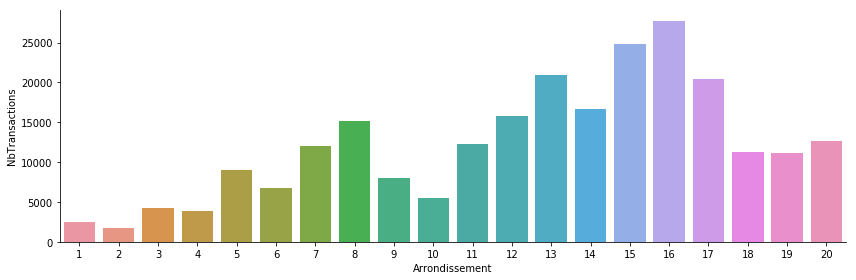

In [51]:
import seaborn


%matplotlib inline

seaborn.catplot(x = "Arrondissement", y = "NbTransactions",
                data = res, kind = "bar", height = 4, aspect = 3)

On s'aperçoit ainsi que le seizième arrondissement est celui ayant connu le plus grand nombre de transactions tandis que l'arrondissement parisien ayant eu le moins de transactions parmi tous est le vingtième.

Nous pouvons également calculer le montant total et le montant moyen des transactions par arrondissement.
Commençons par calculer le montant total des transactions par arrondissement :

In [17]:
horo.transactions_small.find_one()

{'_id': ObjectId('56eaaa009fae0d71f756f620'),
 'horodateur': 36590413,
 'date horodateur': datetime.datetime(2014, 7, 16, 12, 51, 9),
 'usager': 'Rotatif',
 'moyen de paiement': 'Paris Carte',
 'durée payée (h)': 1.0,
 'début stationnement': datetime.datetime(2014, 7, 16, 12, 51, 9),
 'fin stationnement': datetime.datetime(2014, 7, 16, 13, 51, 9),
 'montant': 1.2}

In [82]:
montant_total = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "Total" : { "$sum" : "$transaction.montant carte" }}},
    { "$project": { "Arrondissement": "$_id", "Total des transactions": "$Total", "_id": 0 }},
    { "$sort": {"Arrondissement": 1}}
])))
montant_total

,Arrondissement,Total des transactions
0,1,10083.67
1,2,7466.09
2,3,16828.43
3,4,14237.47
4,5,32905.31
5,6,25233.70
6,7,45635.66
7,8,52881.66
8,9,24646.26
9,10,15431.90


On représente alors graphiquement ce dataframe comme suit :

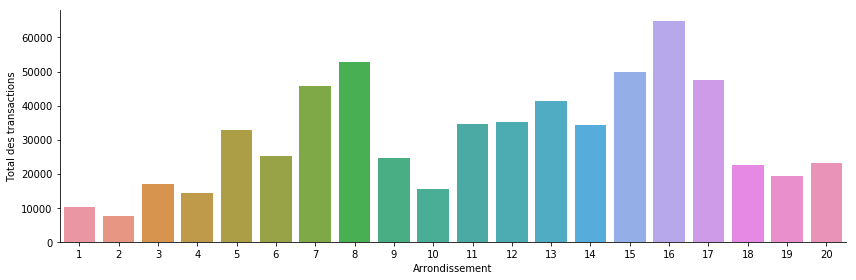

In [85]:
seaborn.catplot(x = "Arrondissement", y = "Total des transactions",
                data = montant_total, kind = "bar", height = 4, aspect = 3)

In [86]:
montant_moyen = pandas.DataFrame(list(horo.mobiliers.aggregate([
    { "$lookup": {
        "from": "transactions_small",
        "localField": "fields.numhoro",
        "foreignField": "horodateur",
        "as": "transaction"
    }},
    { "$unwind" : "$transaction"},
    { "$group" : { "_id" : "$fields.arrondt", "Total" : { "$avg" : "$transaction.montant carte" }}},
    { "$project": { "Arrondissement": "$_id", "Moyenne des transactions": "$Total", "_id": 0 }},
    { "$sort": {"Arrondissement": 1}}
])))
montant_moyen

,Arrondissement,Moyenne des transactions
0,1,3.971512
1,2,4.178002
2,3,3.959631
3,4,3.665672
4,5,3.654115
5,6,3.719590
6,7,3.795381
7,8,3.499084
8,9,3.072717
9,10,2.812448


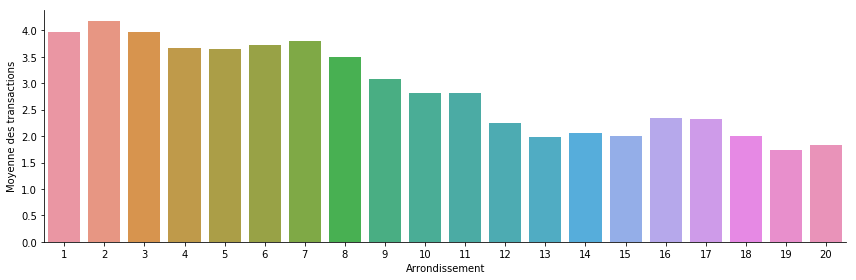

In [87]:
seaborn.catplot(x = "Arrondissement", y = "Moyenne des transactions",
                data = montant_moyen, kind = "bar", height = 4, aspect = 3)

Nous allons maintenant réaliser des cartes multiples de type _small multiples_. Dans un premier temps, nous représenterons la répartition des différents types de mobiliers dans Paris puis, dans un second temps, nous représenterons la répartition des différents types d'alimentation au sein de la capitale française.

In [15]:
import folium
import json

geo = json.load(open("paris-arrondissements.geojson"))

centre = [48.86, 2.35]
carte = folium.Map(location = centre, zoom_start = 12)
carte.choropleth(geo_data = geo)
carte

/opt/conda/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
